In [1]:
import sqlite3 as lite
import pandas as pd

con = lite.connect('weather.db')
cur = con.cursor()

df = pd.read_sql_query("SELECT * FROM daily_temp ORDER BY query_time", con, index_col='query_time')
df.head()

,Boston,Seattle,Miami,Cleveland,Nashville
query_time,,,,,
1448359445,43.16,46.60,76.31,44.94,59.85
1448445845,43.79,46.01,77.31,58.77,64.85
1448532244,57.11,48.97,79.49,64.12,71.56
1448618643,63.37,48.63,79.43,60.78,68.76
1448705042,57.01,45.36,80.02,42.45,64.07


In [2]:
df.describe()

,Boston,Seattle,Miami,Cleveland,Nashville
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,50.218333,47.511667,79.195333,50.572333,61.167667
std,6.535574,5.166712,2.304022,8.954660,7.712421
min,36.900000,37.210000,74.570000,31.700000,40.440000
25%,44.670000,44.190000,77.375000,43.125000,58.572500
50%,50.915000,46.280000,79.520000,50.510000,61.180000
75%,55.890000,50.407500,81.090000,56.615000,67.475000
max,63.370000,60.440000,83.250000,64.660000,72.740000


In [3]:
df[df.columns].max() - df[df.columns].min()

Boston       26.47
Seattle      23.23
Miami         8.68
Cleveland    32.96
Nashville    32.30
dtype: float64

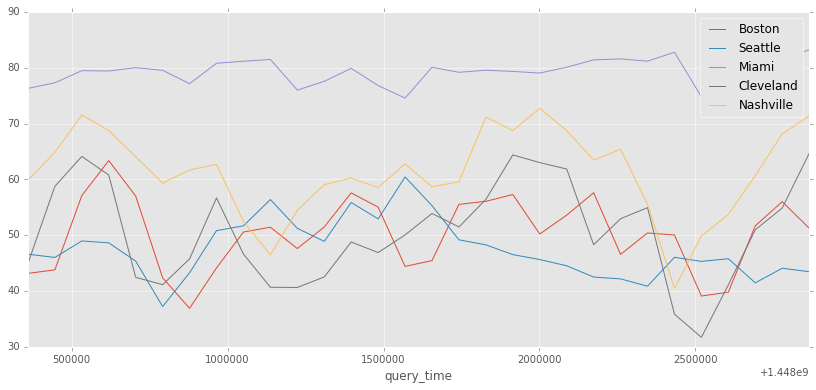

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

df.plot(figsize=(14,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE73B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3824E0>]], dtype=object)

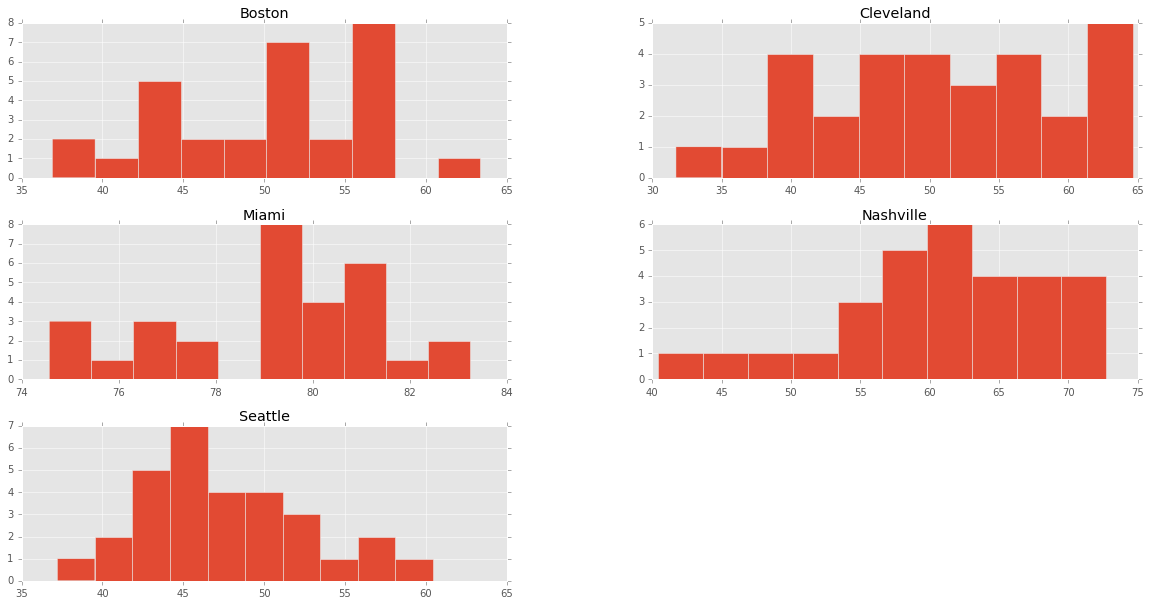

In [5]:
df.hist(figsize=(20,10))

In [6]:
change_df = pd.DataFrame(abs(df[1:].values-df[:-1]), columns=df.columns)
change_df.describe()

,Boston,Seattle,Miami,Cleveland,Nashville
count,29.000000,29.000000,29.000000,29.000000,29.000000
mean,5.633793,3.204828,1.863448,6.382069,5.288276
std,4.156740,2.537511,1.909453,5.075152,3.440081
min,0.360000,0.330000,0.060000,0.040000,0.890000
25%,2.550000,0.880000,0.400000,2.410000,2.800000
50%,4.750000,2.620000,1.310000,4.660000,4.590000
75%,7.230000,5.160000,2.330000,9.790000,6.950000
max,14.640000,8.150000,8.000000,19.090000,15.100000


In [7]:
#Total change for each city
change_df[change_df.columns].sum()

Boston       163.38
Seattle       92.94
Miami         54.04
Cleveland    185.08
Nashville    153.36
dtype: float64

In [8]:
change_df[change_df.columns].max() - change_df[change_df.columns].min()

Boston       14.28
Seattle       7.82
Miami         7.94
Cleveland    19.05
Nashville    14.21
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7ADEB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED22DA0>]], dtype=object)

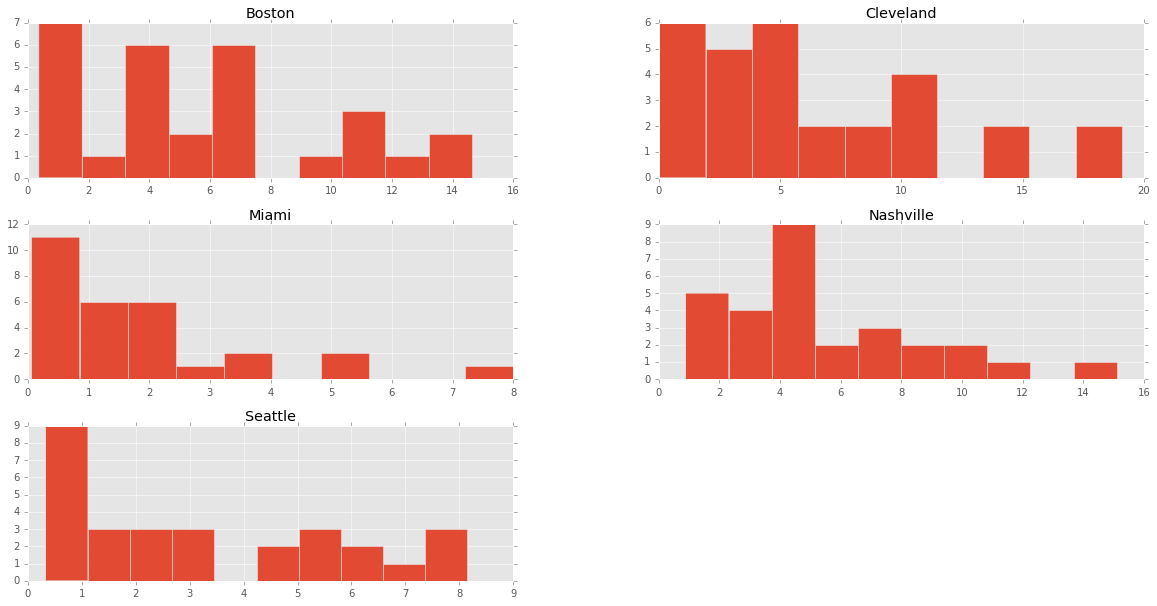

In [9]:
change_df.hist(figsize=(20,10))

### Conclusion

Overall, Cleveland had the highest range in temperatures (31.70F to 64.66F across the 30 day period) but not by much, as well as the largest total fluctuation in temperature across the 30 day period. Cleveland also had the highest single day-to-day temperature change (19.05F), and the highest total change in day-to-day temperature across the 30 day period.